# Basic NN Model from Scrap with Numpy

Goal of this notebook is to better understand how a NN model actually works by seeing all the process that happens within a model. This means the forward pass and backward propagation of the model will be done manuually, with nummpy. For splitting and scaling the data, sklearn will still be used just to make the preprocessing step much faster.

The data being used in this notebook is origanated from kaggle which is also presented in this github repository. This model consist of 1 neuron using the sigmoid activation function. For evaluation, the accuracy and confusion matrix will be made below and for the testing loss will be presented in a graph.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
x = np.array( df.iloc[:, df.columns != 'output'])
y = np.array(df.iloc[:, -1])

print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [4]:
X_train, X_test,y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Process

The standard NN process consist of using randomly scored weights and bias, which will be corrected overtime by each iteration using backpropagation to ensure better result and performance.

Meanwhile the forward pass consist of passing the sum of the weights and bias into an activation function. As the activation function in the model is non-linear, this will make the linear outcome of the sum into a non linear output. This makes the model be able to handle more complex sort of datas which usually have a non-linear relationship.

In simple terms, the backpropagation is used to minimize the errors created by the forward pass by adjusting the weights and bias by finding the gradient.

The test loss is used to see how the model runs on testing data. The main focus is to make sure the model isn't overfitted or underfitted.

In [9]:
class NN:
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.L_train = []
        self.L_test = []
        
    def activation(self, x):
        return 1 / (1 + np.exp(-x))

    def dactivation(self, x):
        return self.activation(x) * (1 - self.activation(x))

    def forward(self, X):
        hidden_layer1 = np.dot(X, self.w) + self.b
        activate_1 = self.activation(hidden_layer1)
        return activate_1

    def backward(self, X, y_true):
        hidden_layer1 = np.dot(X, self.w) + self.b
        y_pred = self.forward(X)
        dL_dpred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.dactivation(hidden_layer1)
        dhidden1_db = 1
        dhidden1_dw = X

        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw
        return dL_db, dL_dw

    def optimizer(self, dL_db, dL_dw):
        # update weights
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self, epoch):
        for i in range(epoch):
            random_pos = np.random.randint(len(self.X_train))
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.X_train[random_pos])
            L = np.sum(np.square(y_train_pred - y_train_true))
            
            self.L_train.append(L)
            dL_db, dL_dw = self.backward(self.X_train[random_pos], self.y_train[random_pos])
            
            self.optimizer(dL_db, dL_dw)

            L_test_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_test_sum += np.square(y_pred - y_true)
            self.L_test.append(L_test_sum)

        return "training finished"

# Training and Evaluation

For hyperparameters in this basic model, the learning rate and number of iteration will be set like in the coloumn below. Accuracy and the other evaluations will be also calculated by checking the number of correct predictions over the total test.

In [10]:
learning_rate = 0.1
epoch = 1000

In [11]:
model = NN(LR= learning_rate, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
model.train(epoch=epoch)

'training finished'

In [12]:
total = X_test.shape[0]
correct = 0
y_preds = []
y_trues =[]
for i in range(total):
    y_true = (y_test[i])
    y_trues
    y_pred = np.round(model.forward(X_test[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0
acc = correct / total
print(acc)

0.8360655737704918


[Text(0.5, 1.0, 'Test Lost')]

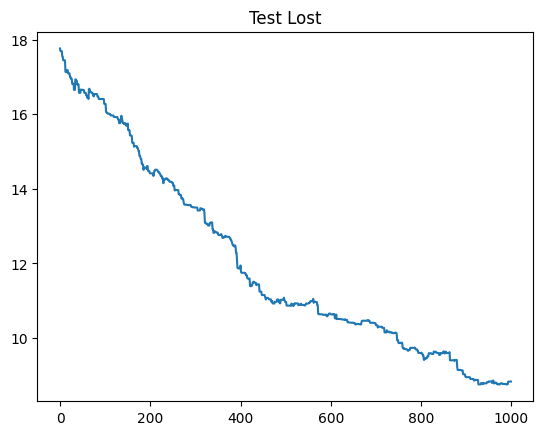

In [13]:
sns.lineplot(x=list(range(len(model.L_test))), y= model.L_test).set(title='Test Lost')

In [14]:
confusion_matrix(y_true = y_test, y_pred = y_preds)

array([[26,  3],
       [ 7, 25]])